# Online social platform model

6 May 2020

We present here a review for the online social platform model for proceed to use this elements to formulate the OSP portfolio optimization problem.

$\textbf{Model}$: We analyse the influence of users in a generic online social platform.

In such a platform, there are $N > 2$ users in total. Each user $n$ is considered as a virtual node and has a Newsfeed and a Wall. Suppose the Newsfeed of size $M > 0$ and the Wall of size $K >0$. Furthermore, each user has a set of leaders, $L^{(n)}$, and she/he can be the leader of others. The Newsfeed of $n$ is refreshed instantaneously by insertion of posts published on the Walls of his Leaders. The user visits his Newsfeed and chooses among the currently available posts to re-post on his own Wall with rate $\mu^{(n)}\geq 0$ [posts/unit-time]. Additionally, he produces own posts on his Wall with rate $\lambda^{(n)}\geq 0$. These posts are marked on their generation by the user-author index $(n)$.

$\textbf{Assumptions}$: The choice of which post to share on one's Wall and which post to evict when a new post arrives is uniformly random, among the present posts on the Wall and the Newsfeed. Also, both post-feed processes per user are assumed Poisson.

Consider a particular user $i$. The steady-state probability to find posts from user $i$ on the Newsfeed and Wall of user $n$ is the tuple $(p_i^{(n)},q_i^{(n)})$. With this, we form the steady state column-vectors

$P_{vec}(i):=(P_{vec}(1,i),\ldots,P_{vec}(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$, and

$Q_{vec}(i):=(Q_{vec}(1,i),\ldots,Q_{vec}(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$.

These are the steady-state vectors for posts of origin $(i)$ on all the Newsfeeds and Walls of users.

We define the influence of user $i$ on user $n$, $q^{(n)}_i$, as the steady-state probability that a post found on the Wall of user $n$ is of label $i$, i.e., has been originally created by user $i$. Note that these probabilities are performance parameters that will be the output of the developed models. We propose the following metric of influence, $\Psi_i =\frac{1}{N-1} \sum_{n \not=i} q^{(n)}_i$.

### Linear System solution (Theorem 2 from paper)

Linear System solution (Theorem 2 from paper)
To find the values of the steady-state vectors $P_{vec}(i)$ and $Q_{vec}(i)$, one needs to solve the following linear system (formulas $(12)-(13)$):

$(12) \space P_{vec}(i) = AP_{vec}(i) + b(i)$

$(13) \space Q_{vec}(i) = C_{vec}(i) + d(i).$

In the above $A$, $C$ are $N\times N$ matrices and $b(i)$, $d(i)$ are $N\times 1$ column vectors.

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

### Implementation
$\textbf{Notes}$: For the implementation, we first generate an input from graphs of specific form. We choose here to generate a Erdos-Renyi graph, Albert-Barabasi granp, Ring graph and a Grid graph. Furthermore, we allow the choice of self-posting and re-posting rates.

The implementation will fill in the matrices A,C and the vectors b,d for any user and perform the matrix calculations presented in the paper. The methods to solve can be found as Theorem 3 and Theorem 4. The time of convergence of (M1) and (M2) depends on the number of user as well as the maximum number of iterations and the epsilon in the convergence criterion $||p_{neq}-p_{old}||_{\infty}<eps$. We set: $it =1000$ and $eps = 0.0001$ by default. Note that the implementation of (M2) is not sparse and the simple version outperforms (M1) in examples where the graph structure is non-symmetric.

Finally, we found through the method desired by the user (M1) or (M2) the vector of steady states probabilities for the Newsfeeds, for the Walls and the vector of influences for each user.

###### As an observation, we will print the results obtained. However, we will later hide the print functions from execution because we will load the functions defined here in the OSP portfolio optimization problem.

In [1]:
%pylab inline
import math
import numpy as np
import time
import networkx as nx
from numpy import inf

Populating the interactive namespace from numpy and matplotlib


## Input Graphs
We first would like to generate the input graphs for our Social platform.

We propose four graph categories: (I) Erdos-Renyi Graph, (II) Albert-Barabasi Graph, (III) Ring Graph, (IV) Grid Graph.

For each graph, we need to define: (1) number of users $N$, (2) self- and re-post activity rate N-vectors, $L_{vec}$ and $M_{vec}$ (3) Leader graph (either NxN or list), (4) the cost per post for each user and (5) the user $i$ who orchestrates the advertising campaign.

For the special cases Erdos-Renyi, Albert-Barabasi and Ring Graph, a probability $pr$ in Erdos-Renyi graph $G(N,p)$, the number of edges $m$ to attach from a new node to existing nodes in the Barabasi-Albert model and a radius $R$ should also be defined, which determines the number of leaders per user.

In [2]:
# Number of users in Social graph, pr probability in Erdos-Renyi graph G(N,pr) and m is the number of edges to attach from a new node to existing nodes in the Barabasi-Albert model
N=25
m=3
pr=.2

### I. Erdos-Renyi Graph

We fix the probability $pr$ and a Erdos-Renyi graph $G(N,pr)$ is constructed. Namely by connecting nodes randomly with directed edges where each edge is included in the graph with probability $pr$ independent from every other directed edge. 

Note: In this implementation we assume users indexed from $n=0,...N-1$, and we use lists, so that the entry e.g. $R_{vec}[0]$ refers to the number of leaders for user "0", and similarly $R_{vec}[n]$ for user "n".

In [3]:
#Graphs------------------------------------------------------------------------------------------------------------------------
#Erdos-Renyi Graph-------------------------------------------------------------------------------------------------------------
def erdosL_graph(N,p):
    Lead = [list() for j in range(N)]
    for n in range(0,N):
        for m in range(0,N):
            if n!=m:
                aux=np.random.binomial(1,p)
                if aux==1:
                    Lead[n].append(m)
    return Lead
#Erdos Renyi graph with our hypotheses (each user has at least one leader)
def erdos_graph(N,p): 
    Lead = erdosL_graph(N,p)
    for n in range(0,N):
        if len(Lead[n])==0:
            return erdos_graph(N,p)
    return Lead

In [4]:
Lead=erdos_graph(N,pr) #We select graph structure
#print("Lead of Erdos-Renyi graph=",Lead)

Lead of Erdos-Renyi graph= [[5], [4, 5, 6, 8, 9, 10, 19, 24], [0, 3, 4, 5, 7, 8, 12, 14, 19, 22], [0, 5, 20], [1, 3, 6, 8, 9], [6, 13, 23], [8, 9], [2, 12, 14, 19, 23], [0, 3, 5, 12, 16, 17], [1, 2, 19, 21], [1, 9, 12, 13, 23, 24], [8, 14, 17, 18, 19, 22], [15, 20, 22], [2, 7, 11, 19, 20, 24], [10, 11, 12, 15, 18, 23, 24], [6, 9, 13], [2, 4, 5, 6, 12], [3, 9, 13, 15, 22], [6, 13, 20], [1, 11, 18, 23], [6, 11, 13, 14, 21], [0, 5, 8, 10, 18, 24], [0, 3, 5, 13, 16, 17], [6, 9, 20], [10, 11, 12, 13, 16]]


We will now draw the produced directed Leader Graph.

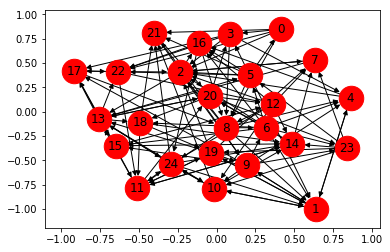

In [5]:
#Gring=nx.DiGraph()
#for n in range(N):
#    ln = list()
#    ln = Lead[n]
#    for j in range(len(ln)):
#        Gring.add_edge(ln[j],n)
#pos=nx.spring_layout(Gring,iterations=100)
#nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### II. Albert-Barabasi Graph

In the Albert-Barabasi graph, we begin with an initial complete network of $m$ nodes and $N-m$ new nodes are added to the network one at a time. Each new node is connected to $m$ existing nodes with a bi-directed edge and a probability that is proportional to the number of links that the existing nodes already have, namely $\frac{\text{degree}_i}{\sum_{j \not=i} \text{degree}_j}$ with $\text{degree}_i$ the degree of user $i$. Then, heavily linked nodes tend to quickly accumulate even more links, while nodes with only a few links are unlikely to be chosen as the destination for a new link. 

In [6]:
#Albert-Barabasi graph---------------------------------------------------------------------------------------------------------
def barabasi_albert(n, m):
    # initialise with a complete graph on m vertices
    Lead=[list() for j in range(N)]
    neighbours=[set(range(m)) - {i} for i in range(m)]
    degrees=[m-1 for i in range(m)]
    for i in range(m, n):
        #Set of new neighbours of user i
        n_neighbours={i for _, i in sorted([(np.random.exponential(w), i) for i, w in enumerate(degrees)])[:m]}
        # add node with back-edges
        neighbours.append(n_neighbours)
        degrees.append(m)
        # add forward-edges
        for j in n_neighbours:
            neighbours[j].add(i)
            degrees[j] += 1
    for i in range(N):
        for j in range(N):
            if j in neighbours[i]:
                Lead[i].append(j)
    return Lead

In [7]:
Lead=barabasi_albert(N, m) #We select graph structure
#print("Lead of Albert-Barabasi graph=",Lead)

Lead of Albert-Barabasi graph= [[1, 2, 3, 4, 5, 7, 10, 13, 14, 15], [0, 2, 3, 6, 7, 9, 10, 11, 21], [0, 1, 3, 4, 5, 7, 8, 12], [0, 1, 2, 4, 6, 8, 22, 23], [0, 2, 3, 5, 6, 9, 17], [0, 2, 4, 11, 24], [1, 3, 4, 8, 12, 13], [0, 1, 2, 15, 16, 20, 24], [2, 3, 6, 9, 10, 13, 15, 19], [1, 4, 8, 11, 12, 18], [0, 1, 8, 14, 22], [1, 5, 9, 16, 22], [2, 6, 9, 14, 19, 20], [0, 6, 8], [0, 10, 12, 16, 17], [0, 7, 8, 21, 23], [7, 11, 14, 17, 18], [4, 14, 16, 18], [9, 16, 17, 19, 20], [8, 12, 18, 21, 23], [7, 12, 18], [1, 15, 19], [3, 10, 11, 24], [3, 15, 19], [5, 7, 22]]


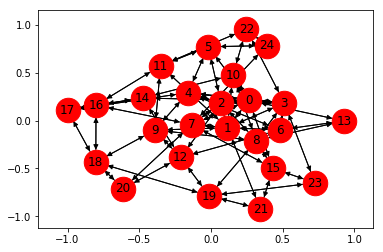

In [8]:
#Gring=nx.DiGraph()
#for n in range(N):
#    ln = list()
#    ln = Lead[n]
#    for j in range(len(ln)):
#        Gring.add_edge(ln[j],n)
#pos=nx.spring_layout(Gring,iterations=100)
#nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### III. Ring Graph
we set the symmetric ring graph. Each node follows $R$ users at his right and left, so that in total she/he has $2R$ leaders. Obviously, $2R<N$.

In [9]:
#Ring graph-------------------------------------------------------------------------------------------------------------------
# Inout Radius
# Defines radius in ring for each user
# Radius scenario 1: random with maximum 2R < N
Rhigh = int(N/2)
Rvec1 = np.random.randint(0,Rhigh+1,N)
#
# Radius scenario 2: all users same radius R
R = 2
Rvec2 = R*np.ones(N)
Rvec2 = Rvec2.astype(int)
#
# Radius scenario 3: all users same radius R except user "0"
Rvec3 = list(Rvec2)
Rvec3[0] = 2
Rvec3 = np.asarray(Rvec3)
Rvec3 = Rvec3.astype(int)
#print("Rvec1=",Rvec1,"\n")
#print("Rvec2=",Rvec2,"\n")
#print("Rvec3=",Rvec3,"\n")

Rvec1= [ 8  6  0  7  3  8  9  7  6  6  8  7  0  1  3 10  0  6 11  4  9 11  7  3
  0] 

Rvec2= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

Rvec3= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 



In [10]:
def ring_graph(N, Rvec, lead=1, sym=1):
    # Produces a list of Leaders, i.e. Lead[j] is the list of leaders for node j.
    #
    # The function allows for some variations:
    # Option lead =1: Vector Rvec is for leaders (Rvec[n] is the list of leaders for node n)
    # Option lead =0: Vector Rvec is for followers (Rvec[n]) is the list of followers for node n)
    #
    # Option sym =1: case of symmetric leaders R right and R left of a user
    # Option sym =0: non-symmetric leaders 2R at the right only.
    #
    Lead = list()
    #
    if lead==1 and sym==1:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==1 and sym==0:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==0 and sym==1:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
    elif lead==0 and sym==0:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
    return Lead

In [11]:
LeadRing = ring_graph(N,Rvec1,lead=1,sym=1)
#print("Rvec=",Rvec1)
#print("LeadRing=",LeadRing)

Rvec= [ 8  6  0  7  3  8  9  7  6  6  8  7  0  1  3 10  0  6 11  4  9 11  7  3
  0]
LeadRing= [[1, 2, 3, 4, 5, 6, 7, 8, 24, 23, 22, 21, 20, 19, 18, 17], [2, 3, 4, 5, 6, 7, 0, 24, 23, 22, 21, 20], [], [4, 5, 6, 7, 8, 9, 10, 2, 1, 0, 24, 23, 22, 21], [5, 6, 7, 3, 2, 1], [6, 7, 8, 9, 10, 11, 12, 13, 4, 3, 2, 1, 0, 24, 23, 22], [7, 8, 9, 10, 11, 12, 13, 14, 15, 5, 4, 3, 2, 1, 0, 24, 23, 22], [8, 9, 10, 11, 12, 13, 14, 6, 5, 4, 3, 2, 1, 0], [9, 10, 11, 12, 13, 14, 7, 6, 5, 4, 3, 2], [10, 11, 12, 13, 14, 15, 8, 7, 6, 5, 4, 3], [11, 12, 13, 14, 15, 16, 17, 18, 9, 8, 7, 6, 5, 4, 3, 2], [12, 13, 14, 15, 16, 17, 18, 10, 9, 8, 7, 6, 5, 4], [], [14, 12], [15, 16, 17, 13, 12, 11], [16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5], [], [18, 19, 20, 21, 22, 23, 16, 15, 14, 13, 12, 11], [19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7], [20, 21, 22, 23, 18, 17, 16, 15], [21, 22, 23, 24, 0, 1, 2, 3, 4, 19, 18, 17, 16, 15, 14, 13, 12, 11], [22, 23,

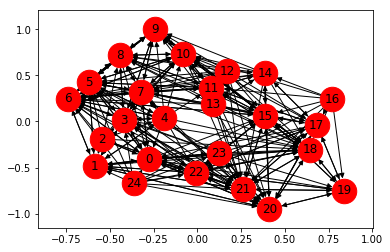

In [12]:
#Gring=nx.DiGraph()
#for n in range(N):
#    ln = list()
#    ln = LeadRing[n]
#    for j in range(len(ln)):
#        Gring.add_edge(ln[j],n)

# Uncomment below to Draw
#pos=nx.spring_layout(Gring,iterations=100)
#nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### IV. Grid graph
In the Grid graph, every node has 4 leaders, except the nodes on the 4 vertices of the Grid who have 2 leaders and the nodes on the edges who have 3.

The size of the grid graph should be such that $\sqrt{N}$ is a postive integer.

In [13]:
#Grid graph---------------------------------------------------------------------------------------------------------------------
def grid_graph(N):
    #
    dim1 = math.sqrt(N)
    #
    # Check validity of Grid size
    if np.abs(dim1-int(dim1))>0:
        return print("not valid graph size N\n")
    #
    dim1 = int(dim1)
    #
    # If size is correct, then produce a list of Leaders.
    # Nodes are indexed from top-left ("0") to bottom-right ("N-1")
    # and in each row the indexing increased from left to right.
    #
    Lead = [list() for j in range(N)]
    #
    # Internal nodes with 4 leaders each.
    for n in range(1,dim1-1):
        for m in range(1,dim1-1):
            indx = dim1*n+m
            Lead[indx].extend([dim1*(n+1)+m, dim1*(n-1)+m, dim1*n+m+1, dim1*n+m-1 ])
    # Four vertices with 2 leaders each.
    Lead[0].extend([1, dim1])
    Lead[dim1-1].extend([dim1-2,dim1*2-1])
    Lead[dim1*(dim1-1)].extend([dim1*(dim1-1)+1,dim1*(dim1-2)])
    Lead[N-1].extend([N-2,dim1*(dim1-1)-1])
    # Remaining nodes on the four edges, not vertices.
    # Top
    for m in range(1,dim1-1):
        Lead[m].extend([m-1,m+1,dim1+m])
    # Bottom
    for m in range(1,dim1-1):
        Lead[dim1*(dim1-1)+m].extend([dim1*(dim1-1)+m-1,dim1*(dim1-1)+m+1,dim1*(dim1-2)+m])
    # Left
    for n in range(1,dim1-1):
        Lead[dim1*n].extend([dim1*n+1,dim1*(n-1),dim1*(n+1)])
    # Right
    for n in range(1,dim1-1):
        Lead[dim1*(n+1)-1].extend([dim1*(n+1)-2,dim1*(n)-1,dim1*(n+2)-1])
    return Lead

In [14]:
Lead=grid_graph(N) #We select graph structure
#print("LeadGrid=",Lead)

LeadGrid= [[1, 5], [0, 2, 6], [1, 3, 7], [2, 4, 8], [3, 9], [6, 0, 10], [11, 1, 7, 5], [12, 2, 8, 6], [13, 3, 9, 7], [8, 4, 14], [11, 5, 15], [16, 6, 12, 10], [17, 7, 13, 11], [18, 8, 14, 12], [13, 9, 19], [16, 10, 20], [21, 11, 17, 15], [22, 12, 18, 16], [23, 13, 19, 17], [18, 14, 24], [21, 15], [20, 22, 16], [21, 23, 17], [22, 24, 18], [23, 19]]


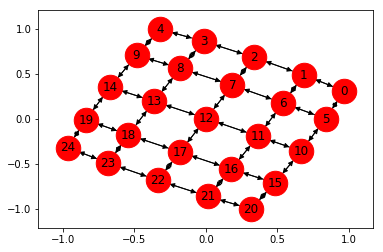

In [15]:
#Gring=nx.DiGraph()
#for n in range(N):
#    ln = list()
#    ln = Lead[n]
#    for j in range(len(ln)):
#        Gring.add_edge(ln[j],n)
#pos=nx.spring_layout(Gring,iterations=100)
#nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

## General Input

We first define the general input (1),(2) and (3) related to size and activity. So, we could calculate using (M1) or (M2) the influence metric for each user and then we could get the cost per post (4) for each user and get our basic feasible solution 
through the simplex method.

We give three example options for the activity to post and re-post. These are just input examples, and can be chosen arbitrarily, depending on the scenario to be tested.

In [16]:
#General Input (N, Lvec, Mvec)--------------------------------------------------------------------------------------------------
N=200
#print("N=",N,'\n') # network size
# Activity
# Activity Scenario case 1: random activity
Amax = 100 #maximum activity rate in the random choice (case 1)
Lvec1 = np.random.uniform(0,Amax, N)
Mvec1 = np.random.uniform(0,Amax, N)
#
Lvec1 = np.round(Lvec1, 5)
Mvec1 = np.round(Mvec1, 5)
# Activity Scenario case 2: symmetric activity
lam = 1.
mu = 1
Lvec2 = lam*np.ones(N, np.float64)
Mvec2 = mu*np.ones(N, np.float64)
#
# Activity Scenario case 3: asymmetric activity for 1 user
lam1 = 10
mu1 = 0.5
Lvec3 = list(Lvec2)
Mvec3 = list(Mvec2)
Lvec3[0] = lam1
Mvec3[0] = mu1
Lvec3 = np.asarray(Lvec3)
Mvec3 = np.asarray(Mvec3)
#
#print("Lvec1=",Lvec1,"\n","Mvec1=",Mvec1,"\n")
#print("Lvec2=",Lvec2,"\n","Mvec2=",Mvec2,"\n")
#print("Lvec3=",Lvec3,"\n","Mvec3=",Mvec3,"\n")

Lvec1= [64.95925 56.78822 94.51179  9.33346  1.67028 99.9993   0.386   80.41433
 61.4378  16.79259 88.316   74.35366 91.24501 43.01005 96.79769 68.71936
  1.90325 36.55435 94.43087  9.28404 50.14057 74.54689 14.57022 55.16354
 43.00255 63.59352 71.31673 93.49913 66.57618 74.26336  4.7392  82.67625
 70.72126 51.74799 56.12923 75.75006 13.2801  55.79467 12.86564  1.78277
 78.12233 84.36805 76.68989  6.73395 27.619   84.48634 83.79282  4.85574
 77.70131 29.38395  1.17874 65.15901 35.74786 97.79279 60.24386 51.46015
 15.97519 84.78402 65.81383 45.63175 38.9941  42.59081 13.34807 82.68449
 53.9195  93.96652 63.22031 28.69615 93.65434  2.60473 13.06978 87.41087
 31.47429 31.09601 70.72547 35.87668 46.72331  7.79937 22.58729 40.27065
 29.36355 69.23895 47.70805  3.68985  1.26999 68.56123 22.52268 65.05674
  7.88993 40.62555 87.69881 60.32068 72.0938  41.38919 85.56067 79.85575
 31.59774 77.06309 31.94525 24.61561 86.06552 50.57695  9.98055 82.19543
 98.67541 24.23826 83.36442 30.23072 75.5501

#### Input parameter

The input chosen:

In [17]:
#print("N=",N,'\n')
Lvec = Lvec1
#print("Lvec=",Lvec,'\n')
Mvec = Mvec1
#print("Mvec=",Mvec,'\n')

Lvec= [64.95925 56.78822 94.51179  9.33346  1.67028 99.9993   0.386   80.41433
 61.4378  16.79259 88.316   74.35366 91.24501 43.01005 96.79769 68.71936
  1.90325 36.55435 94.43087  9.28404 50.14057 74.54689 14.57022 55.16354
 43.00255 63.59352 71.31673 93.49913 66.57618 74.26336  4.7392  82.67625
 70.72126 51.74799 56.12923 75.75006 13.2801  55.79467 12.86564  1.78277
 78.12233 84.36805 76.68989  6.73395 27.619   84.48634 83.79282  4.85574
 77.70131 29.38395  1.17874 65.15901 35.74786 97.79279 60.24386 51.46015
 15.97519 84.78402 65.81383 45.63175 38.9941  42.59081 13.34807 82.68449
 53.9195  93.96652 63.22031 28.69615 93.65434  2.60473 13.06978 87.41087
 31.47429 31.09601 70.72547 35.87668 46.72331  7.79937 22.58729 40.27065
 29.36355 69.23895 47.70805  3.68985  1.26999 68.56123 22.52268 65.05674
  7.88993 40.62555 87.69881 60.32068 72.0938  41.38919 85.56067 79.85575
 31.59774 77.06309 31.94525 24.61561 86.06552 50.57695  9.98055 82.19543
 98.67541 24.23826 83.36442 30.23072 75.55014

Choose between our graphs:

In [18]:
# In case we choose Albert-Barabasi:
#Lead = barabasi_albert(N, m)
# In case we choose Ring:
#Lead = ring_graph(N,Rvec,lead=1,sym=1)
# In case we choose Grid:
#Lead = grid_graph(N)
#
# In case we choose Erdos-Renyi:
Lead = erdos_graph(N,pr)
#print("Lead=",Lead)

Lead= [[2, 12, 20, 21, 39, 45, 46, 48, 53, 57, 60, 72, 78, 79, 84, 90, 91, 95, 96, 98, 99, 114, 116, 118, 125, 129, 139, 140, 148, 150, 153, 154, 160, 173, 177, 182, 194, 196, 197], [14, 17, 19, 21, 23, 29, 30, 31, 32, 34, 36, 37, 39, 42, 44, 47, 52, 58, 61, 66, 72, 80, 83, 88, 97, 101, 102, 104, 105, 113, 116, 126, 128, 129, 134, 141, 160, 170, 181, 184, 188, 190], [7, 10, 15, 16, 27, 41, 50, 51, 52, 53, 54, 61, 69, 71, 75, 76, 77, 78, 85, 93, 99, 101, 103, 104, 107, 110, 111, 125, 126, 130, 132, 133, 137, 144, 150, 155, 162, 183], [1, 5, 10, 23, 24, 30, 44, 53, 55, 61, 68, 72, 74, 82, 93, 95, 102, 105, 109, 114, 115, 120, 123, 125, 126, 137, 141, 144, 146, 156, 177, 179, 182, 186, 196], [0, 2, 13, 17, 20, 29, 31, 32, 37, 41, 45, 52, 60, 66, 70, 71, 76, 85, 86, 87, 91, 98, 101, 102, 107, 108, 112, 117, 120, 125, 150, 156, 158, 166, 169, 175, 178, 180, 184, 187, 194, 197, 198, 199], [2, 6, 17, 18, 19, 20, 27, 29, 49, 50, 64, 67, 68, 73, 79, 80, 82, 90, 93, 94, 98, 103, 122, 128, 133, 1

From the Linear System solution, it is necessary to first populate the matrices $A$ and $C$, which are relevant for any solution process of the system.

In [19]:
def fill_A(N,Lvec,Mvec,Lead):
    A = np.zeros((N,N))
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    Som = np.zeros(N)
    for j in range(N):
        Som[j] = sum(Lvec[Lead[j]]+Mvec[Lead[j]])
        for n in range(len(Lead[j])):
            k = Lead[j][n]
            A[j,k] = Mvec[k]/Som[j]
    return A

In [20]:
AA= fill_A(N,Lvec,Mvec,Lead)
#print(AA)

[[0.         0.         0.00758742 ... 0.01746072 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02324591 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [21]:
def fill_C(N,Lvec,Mvec):
    C = np.zeros((N,N))
      # C is diagonal.
        #
    for j in range(N):
        if Lvec[j]+Mvec[j]>0:
            C[j][j] = Mvec[j]/(Lvec[j]+Mvec[j])
    return C

In [22]:
CC = fill_C(N,Lvec,Mvec)
#print(CC)

[[0.22201742 0.         0.         ... 0.         0.         0.        ]
 [0.         0.55542304 0.         ... 0.         0.         0.        ]
 [0.         0.         0.24186083 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.49805575 0.         0.        ]
 [0.         0.         0.         ... 0.         0.54706835 0.        ]
 [0.         0.         0.         ... 0.         0.         0.25126397]]


In [23]:
def fill_bi(i,N,Lvec,Mvec,Lead):
    bi = np.zeros(N)
    for j in range(N):
        if i in Lead[j]:
            bi[j] = Lvec[i]/sum(Lvec[Lead[j]]+Mvec[Lead[j]])
    return bi

In [24]:
bbi = fill_bi(0,N,Lvec,Mvec,Lead)
#print(bbi)

[0.         0.         0.         0.         0.01535617 0.
 0.         0.         0.         0.         0.0170992  0.
 0.         0.01461042 0.         0.         0.         0.
 0.         0.         0.         0.01353252 0.         0.
 0.01708416 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02055732 0.         0.01852285 0.020493   0.         0.
 0.         0.         0.         0.         0.         0.
 0.01569661 0.         0.         0.         0.         0.
 0.         0.0137383  0.01369968 0.         0.         0.0159123
 0.         0.         0.01847424 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02287409 0.         0.         0.         0.
 0.         0.         0.01518074 0.01639273 0.         0.0155522
 0.         0.         0.01535777 0.         0.         0.
 0.         0.         0.         0.         0.         0.0128142
 0.         0.         0.         0

We continue by including the column vectors $b_i$ and $d_i$, for a specific label $i$.

In [25]:
def fill_di(i,N,Lvec,Mvec):
    di = np.zeros(N)
    di[i] = Lvec[i]/(Lvec[i]+Mvec[i])
    return di

In [26]:
ddi = fill_di(0,N,Lvec,Mvec)
#print(ddi)

[0.77798258 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can write down the main routine to find the fixed point. There are two methods:

#### (M1) the first method is based on matrix inversion (Theorem 3)

$p_i = (I_N-A)^{-1}b_i$, and

$q_i = Cp_i + d_i$.

So, we first solve the system for a specific label $i$, for the solution of all labels $i=1,...,N$ one needs to calculate the matrix inverse only once and the vector $bi$ has very few non-zero entries, and finally we return two matrices with the elements $p_i$, $q_i$ and one vector with the elements $\Psi_i$.

In [27]:
#Closed-form algorithm----------------------------------------------------------------------------------------------------------
def InvM(N,Lvec,Mvec,Lead):    
    # Newsfeed
    P = np.zeros((N,N))
    A = np.zeros((N,N))
    A = fill_A(N,Lvec,Mvec,Lead)
    IN = np.eye(N)
    invIA = np.linalg.inv(IN-A) 
    for i in range(N):
        #if i%100 ==1:
            #print(i)
        bi = fill_bi(i,N,Lvec,Mvec,Lead)
        # 1) Very slow method that needs to calculate every time the inverse:
        #P[:,i] = pi_method1(i,N,Lvec,Mvec,Lead) 
        # 2) Fast method that calculates the inverse just once:
        # P[:,i] = (invIA).dot(bi)
        # 3) Faster method that calculates the inverse once, AND adds only the non-zero elements of bi vector.
        iN0 = np.nonzero(bi)[0]
        P[:,i] = invIA[:,iN0].dot(bi[iN0])   
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    Q = C.dot(P) + D
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    return [P,Q,Psi]

In [28]:
[P1,Q1,Psi1] = InvM(N,Lvec,Mvec,Lead)
#print("P1=",P1,"\n")
#print("Q1=",Q1,"\n")
#print("Psi1=",Psi1,"\n")

P1= [[0.00204427 0.00317772 0.03030707 ... 0.02136158 0.0022116  0.00207498]
 [0.00359384 0.00384724 0.00647774 ... 0.00362191 0.00378419 0.00215123]
 [0.00260624 0.0027381  0.00721678 ... 0.00340223 0.00350842 0.00250129]
 ...
 [0.00264158 0.02146133 0.00752327 ... 0.00445111 0.00383214 0.00237492]
 [0.00372667 0.00334405 0.00620604 ... 0.00357813 0.00279808 0.0017604 ]
 [0.00332879 0.00389111 0.00591473 ... 0.00282583 0.00424392 0.00149374]] 

Q1= [[7.78436438e-01 7.05509597e-04 6.72869758e-03 ... 4.74264254e-03
  4.91013828e-04 4.60680748e-04]
 [1.99610291e-03 4.46713805e-01 3.59788488e-03 ... 2.01169068e-03
  2.10182652e-03 1.19484328e-03]
 [6.30347939e-04 6.62238200e-04 7.59884630e-01 ... 8.22866746e-04
  8.48549402e-04 6.04963985e-04]
 ...
 [1.31565230e-03 1.06889380e-02 3.74700730e-03 ... 5.04161153e-01
  1.90862055e-03 1.18284054e-03]
 [2.03874454e-03 1.82942448e-03 3.39512924e-03 ... 1.95748197e-03
  4.54462390e-01 9.63057678e-04]
 [8.36405086e-04 9.77695541e-04 1.48615847e-03

#### (M2) The second method is based on the fixed point convergence (Theorem 4)

$p_i(t+1) = A.p_i(t) + b_i$, for $t\rightarrow\infty$.

This should converge to $p_i$. Once it is found, the Wall steady-state can be calculated

$q_i = C.p_i + d_i$.

We first solve the fixed point for a specific label $i$, so we define the matrix composed by the fixed point covergence for each $i$ and return two matrices with the elements $p_i$, $q_i$ and one vector with the elements $\Psi_i$.

In [29]:
#Fixed-point algorithm----------------------------------------------------------------------------------------------------------
def PM(N,Lvec,Mvec,Lead,it = 1000, eps = .0001):
    # The fixed point solution is slow because the fixed point needs to be 
    # calculated for each label i separately.
    # Newsfeed
    P_old = np.zeros((N,N))
    A = fill_A(N,Lvec,Mvec,Lead)
    B = np.zeros((N,N))
    for i in range(N):
        # Slow: repeat pi_method2 for all i
        # P[:,i] = pi_method2(i,N,Lvec,Mvec,Lead,it = 1000, eps = .0001)
        # Fast: Do one iteration for matrix P and B.
        B[:,i] = fill_bi(i,N,Lvec,Mvec,Lead)
    P0 = np.ones((N,N))/N
    P_new = list(P0)
    P_new = np.asarray(P_new)
    t = 0
    while (t<it) & (np.linalg.norm(P_old-P_new,ord=inf)>eps):
        P_old = list(P_new)
        P_old = np.asarray(P_old)
        P_new = list(A.dot(P_old)+B)
        P_new = np.asarray(P_new)
        t += 1
    P = list(P_new)
    P = np.asarray(P)
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    Q = C.dot(P) + D
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    return [P,Q,Psi]

In [30]:
[P2,Q2,Psi2] = PM(N,Lvec,Mvec,Lead)
#print("P2=",P2,"\n")
#print("Q2=",Q2,"\n")
#print("Psi2=",Psi2,"\n")

P2= [[0.00204417 0.00317761 0.03030646 ... 0.02136143 0.00221142 0.00207502]
 [0.00359373 0.00384711 0.00647702 ... 0.00362174 0.00378397 0.00215128]
 [0.00260614 0.00273797 0.00721613 ... 0.00340208 0.00350822 0.00250134]
 ...
 [0.00264146 0.02146118 0.00752251 ... 0.00445093 0.00383191 0.00237497]
 [0.00372656 0.00334392 0.00620537 ... 0.00357797 0.00279788 0.00176045]
 [0.00332869 0.00389099 0.00591408 ... 0.00282568 0.00424372 0.00149379]] 

Q2= [[7.78436417e-01 7.05483785e-04 6.72856217e-03 ... 4.74261060e-03
  4.90972984e-04 4.60690691e-04]
 [1.99603941e-03 4.46713729e-01 3.59748740e-03 ... 2.01159693e-03
  2.10170662e-03 1.19487247e-03]
 [6.30322543e-04 6.62207899e-04 7.59884471e-01 ... 8.22829255e-04
  8.48501454e-04 6.04975656e-04]
 ...
 [1.31559220e-03 1.06888663e-02 3.74663113e-03 ... 5.04161064e-01
  1.90850708e-03 1.18286816e-03]
 [2.03868577e-03 1.82935436e-03 3.39476138e-03 ... 1.95739521e-03
  4.54462279e-01 9.63084688e-04]
 [8.36378947e-04 9.77664354e-04 1.48599486e-03

The time of convergence of (M2) depends on the maximum number of iterations and the epsilon in the convergence criterion

The two methods bring the same result. For (M1) the inverse is calculated only once for all $i$, however, it can be computetionally very hard to calculate exactly the inverse as the size $N$ of the network increases. (M2) The fixed point iteration can be performed for the matrix $P$ using matrix $B$ containing all vectors $b_i$, hence one iteration is enough (although this will enforce that convergence should be guaranteed for all users $i$, it is thus worse-case criterion). One needs to find the trade-off between calculating the inverse and iterating the fixed point process, to decide what is faster.

## Reference

[1]. Giovanidis, A., Baynat, B., & Vendeville, A. (2019, April). Performance analysis of online social platforms. In IEEE INFOCOM 2019-IEEE Conference on Computer Communications (pp. 2413-2421). IEEE.